Accuracy: 0.8946
Precision: 0.8864
Recall: 0.9052
F1 Score: 0.8957
Log Loss: 0.2834
ROC-AUC: 0.9597


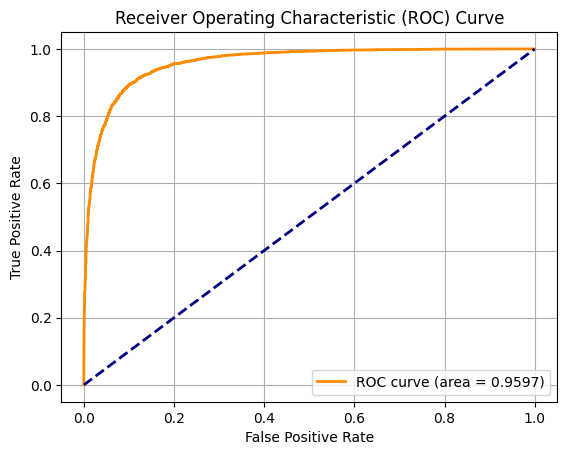

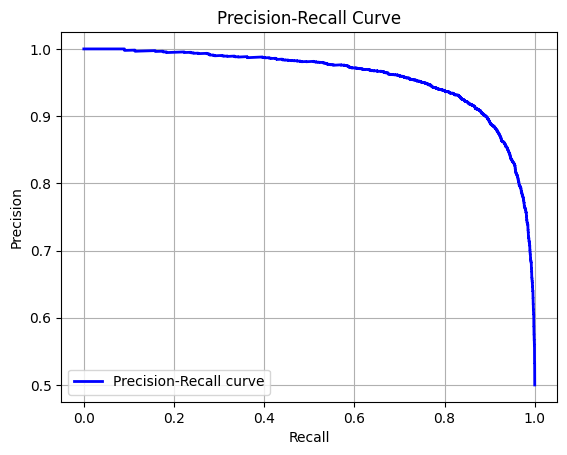

In [ ]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve, auc, precision_recall_curve

# Loads the dataset
file_path = 'IMDB Dataset.csv'
data = pd.read_csv(file_path)

# Function to preprocess text
def preprocess_text(text):
    # Removes the HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Removes all special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Converts it to lowercase
    text = text.lower()
    # Removes all extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocesses the review text
data['review'] = data['review'].apply(preprocess_text)

# Converts the sentiment labels into binary values
# 0 for negative and 1 for positive
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])  

# Splits the dataset into training and testing sets
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizes the reviews using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Trains a logistic regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# Makes predictions
y_pred = log_reg.predict(X_test_tfidf)
y_pred_proba = log_reg.predict_proba(X_test_tfidf)[:, 1]

# Evaluates the model with performance metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "Log Loss": log_loss(y_test, y_pred_proba),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
}

# Prints the performance metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plots the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plots the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()
